In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the images to [-1, 1]
x_train = (x_train - 127.5) / 127.5
x_train = x_train.astype('float32')



170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [5]:
from tensorflow.keras.layers import Dense, Reshape, Flatten, Conv2D, Conv2DTranspose, LeakyReLU, Dropout
from tensorflow.keras.models import Sequential

def build_generator():
    model = Sequential()
    model.add(Dense(256, input_dim=100))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(32 * 32 * 3, activation='tanh'))
    model.add(Reshape((32, 32, 3)))
    return model

def build_discriminator():
    model = Sequential()
    model.add(Flatten(input_shape=(32, 32, 3)))
    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.3))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.3))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    return model


In [ ]:
import numpy as np

# Build and compile the discriminator
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Build the generator
generator = build_generator()

# Create the GAN
gan = Sequential()
gan.add(generator)
gan.add(discriminator)

# Compile the GAN
discriminator.trainable = False
gan.compile(loss='binary_crossentropy', optimizer='adam')

# Training the GAN
def train_gan(gan, generator, discriminator, epochs, batch_size, x_train):
    for epoch in range(epochs):
        # Train the discriminator
        idx = np.random.randint(0, x_train.shape[0], batch_size)
        real_images = x_train[idx]
        noise = np.random.normal(0, 1, (batch_size, 100))
        generated_images = generator.predict(noise)
        labels_real = np.ones((batch_size, 1))
        labels_fake = np.zeros((batch_size, 1))
        d_loss_real = discriminator.train_on_batch(real_images, labels_real)
        d_loss_fake = discriminator.train_on_batch(generated_images, labels_fake)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train the generator
        noise = np.random.normal(0, 1, (batch_size, 100))
        labels_gan = np.ones((batch_size, 1))
        g_loss = gan.train_on_batch(noise, labels_gan)

        if epoch % 10 == 0:
            print(f"{epoch} [D loss: {d_loss[0]} | D accuracy: {100*d_loss[1]}] [G loss: {g_loss}]")

# Train the GAN
train_gan(gan, generator, discriminator, epochs=10000, batch_size=32, x_train=x_train)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


0 [D loss: 0.949176549911499 | D accuracy: 30.46875] [G loss: [array(0.85379505, dtype=float32), array(0.85379505, dtype=float32), array(0.421875, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
10 [D loss: 5.690803527832031 | D accuracy: 20.068994164466858] [G loss: [array(6.011627, dtype=float32), array(6.011627, dtype=float32), array(0.19602273, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
20 [D loss: 8.290121078491211 | D accuracy: 18.602097034454346] [G loss: [array(8.469281, dtype=float32),

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


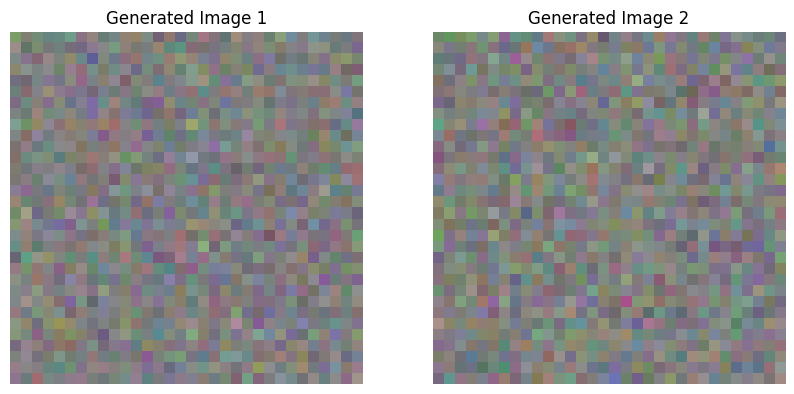

In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Reshape, LeakyReLU, Flatten, Dropout
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt

# Define the generator model
def build_generator():
    model = Sequential()
    model.add(Dense(256, input_dim=100))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(32 * 32 * 3, activation='tanh'))
    model.add(Reshape((32, 32, 3)))
    return model

generator = build_generator()

# Generate two sets of noise
noise_1 = np.random.normal(0, 1, (1, 100))
noise_2 = np.random.normal(0, 1, (1, 100))

# Generate images from the noise
generated_image_1 = generator.predict(noise_1)
generated_image_2 = generator.predict(noise_2)

# Scale the images back to [0, 1]
generated_image_1 = (generated_image_1 + 1) / 2.0
generated_image_2 = (generated_image_2 + 1) / 2.0

# Plot the generated images
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(generated_image_1[0])
axs[0].axis('off')
axs[0].set_title('Generated Image 1')

axs[1].imshow(generated_image_2[0])
axs[1].axis('off')
axs[1].set_title('Generated Image 2')

plt.show()